<a href="https://colab.research.google.com/github/WardahAsad/SignEase/blob/main/K_Nearest_Neighbors_%26_Support_Vector_Machines_Iris_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment: K-Nearest Neighbors & Support Vector Machines for Iris Classification**

## **Objective**  
Train and evaluate **K-Nearest Neighbors (KNN)** and **Support Vector Machines (SVM)** models to classify Iris species based on features like petal length, petal width, sepal length, and sepal width.

---

## **Dataset**  
Use the **Iris dataset** from `sklearn.datasets`. Load it into a Pandas DataFrame and display the first few rows.

---

## **Tasks**  

### **1. Data Preprocessing**  
- Load the **Iris dataset** and check for missing values.  
- Split the dataset into **80% training and 20% testing**.  
- Standardize the features using **StandardScaler**.  

---

### **2. Train K-Nearest Neighbors (KNN) Model**  
- Train a **K-Nearest Neighbors classifier** with the default parameters (use `KNeighborsClassifier` from `sklearn`).  
- Evaluate the model’s performance using accuracy.  
- Experiment with different values of `k` (e.g., 3, 5, 7) and analyze the performance.  

---

### **3. Train Support Vector Machines (SVM) Model**  
- Train a **Support Vector Machine classifier** with the default parameters (use `SVC` from `sklearn`).  
- Evaluate the model’s performance using accuracy.  
- Try different kernels (linear, rbf) and analyze the performance for each kernel.

---

### **4. Hyperparameter Tuning**  
- Use **GridSearchCV** to tune the following hyperparameters for both KNN and SVM models:  
  - For KNN:  
    - `n_neighbors` (Number of neighbors)  
    - `metric` (Distance metric, e.g., 'euclidean', 'manhattan')  
  - For SVM:  
    - `C` (Regularization parameter)  
    - `kernel` (e.g., 'linear', 'rbf')  
    - `gamma` (Kernel coefficient for ‘rbf’, ‘poly’, and ‘sigmoid’)  

---

### **5. Model Evaluation**  
- Compute and print the following metrics for both KNN and SVM models (default and tuned):  
  - **Accuracy**  
  - **Precision**  
  - **Recall**  
  - **F1-Score**  
  - **Confusion Matrix**  

---

### **6. Visualization**  
- Plot the **Confusion Matrix** for both models to evaluate performance.  
- Plot the **ROC curve** for both models to visualize the trade-off between True Positive Rate and False Positive Rate.

---


## **Submission Guidelines**  
- Submit a **Colab Notebook (.ipynb)** with code and visualizations.  



In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, confusion_matrix, roc_curve, auc,
                            ConfusionMatrixDisplay)
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

# Step 1: Load and preprocess the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [ ]:
feature_names = iris.feature_names
print(feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
# Create DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['species'] = y
df['species_name'] = [target_names[i] for i in y]

# Display dataset info
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
 5   species_name       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0 

In [ ]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species_name         0
dtype: int64


In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

KNN with k=3: Accuracy = 1.00
KNN with k=5: Accuracy = 1.00
KNN with k=7: Accuracy = 1.00
KNN with k=9: Accuracy = 1.00
KNN with k=11: Accuracy = 1.00


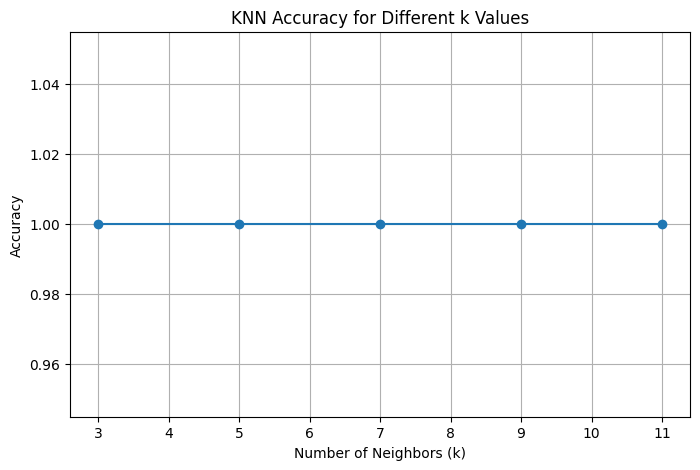

In [ ]:
# Step 2: K-Nearest Neighbors (KNN) Model

# Function to evaluate KNN with different k values
def evaluate_knn(k_values):
    results = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        results.append(acc)
        print(f"KNN with k={k}: Accuracy = {acc:.2f}")
    return results

# Evaluate KNN with different k values
k_values = [3, 5, 7, 9, 11]
knn_accuracies = evaluate_knn(k_values)

# Plot accuracy vs k
plt.figure(figsize=(8, 5))
plt.plot(k_values, knn_accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different k Values')
plt.grid(True)
plt.show()

# Train default KNN model
knn_default = KNeighborsClassifier()
knn_default.fit(X_train_scaled, y_train)
y_pred_knn_default = knn_default.predict(X_test_scaled)

In [ ]:
# Step 3: Support Vector Machine (SVM) Model

# Function to evaluate SVM with different kernels
def evaluate_svm(kernels):
    results = []
    for kernel in kernels:
        svm = SVC(kernel=kernel, probability=True, random_state=42)
        svm.fit(X_train_scaled, y_train)
        y_pred = svm.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        results.append(acc)
        print(f"SVM with {kernel} kernel: Accuracy = {acc:.2f}")
    return results

# Evaluate SVM with different kernels
kernels = ['linear', 'rbf', 'poly']
svm_accuracies = evaluate_svm(kernels)

# Train default SVM model
svm_default = SVC(probability=True, random_state=42)
svm_default.fit(X_train_scaled, y_train)
y_pred_svm_default = svm_default.predict(X_test_scaled)

SVM with linear kernel: Accuracy = 0.97
SVM with rbf kernel: Accuracy = 1.00
SVM with poly kernel: Accuracy = 0.97


In [ ]:
# Step 4: Hyperparameter Tuning

# KNN hyperparameter tuning
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_grid = GridSearchCV(
    KNeighborsClassifier(),
    knn_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("\nStarting KNN Grid Search...")
knn_grid.fit(X_train_scaled, y_train)
best_knn = knn_grid.best_estimator_
y_pred_knn_tuned = best_knn.predict(X_test_scaled)

# SVM hyperparameter tuning
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

svm_grid = GridSearchCV(
    SVC(probability=True, random_state=42),
    svm_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("\nStarting SVM Grid Search...")
svm_grid.fit(X_train_scaled, y_train)
best_svm = svm_grid.best_estimator_
y_pred_svm_tuned = best_svm.predict(X_test_scaled)


Starting KNN Grid Search...
Fitting 5 folds for each of 15 candidates, totalling 75 fits

Starting SVM Grid Search...
Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [ ]:
# Step 5: Model Evaluation

def evaluate_model(name, y_true, y_pred, y_prob=None):
    print(f"\n{name} Model Performance:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision (macro avg): {precision_score(y_true, y_pred, average='macro'):.2f}")
    print(f"Recall (macro avg): {recall_score(y_true, y_pred, average='macro'):.2f}")
    print(f"F1-Score (macro avg): {f1_score(y_true, y_pred, average='macro'):.2f}")

    if y_prob is not None:
        y_test_bin = label_binarize(y_true, classes=[0, 1, 2])
        n_classes = y_test_bin.shape[1]

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        print(f"ROC-AUC Score (macro avg): {np.mean(list(roc_auc.values())):.2f}")

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print("\nConfusion Matrix:")
    print(cm)

# Evaluate models
print("\n=== Evaluation Results ===")

# KNN Default
evaluate_model("KNN Default", y_test, y_pred_knn_default,
               knn_default.predict_proba(X_test_scaled))

# KNN Tuned
evaluate_model("KNN Tuned", y_test, y_pred_knn_tuned,
               best_knn.predict_proba(X_test_scaled))

# SVM Default
evaluate_model("SVM Default", y_test, y_pred_svm_default,
               svm_default.predict_proba(X_test_scaled))

# SVM Tuned
evaluate_model("SVM Tuned", y_test, y_pred_svm_tuned,
               best_svm.predict_proba(X_test_scaled))


=== Evaluation Results ===

KNN Default Model Performance:
Accuracy: 1.00
Precision (macro avg): 1.00
Recall (macro avg): 1.00
F1-Score (macro avg): 1.00
ROC-AUC Score (macro avg): 1.00

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

KNN Tuned Model Performance:
Accuracy: 1.00
Precision (macro avg): 1.00
Recall (macro avg): 1.00
F1-Score (macro avg): 1.00
ROC-AUC Score (macro avg): 1.00

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

SVM Default Model Performance:
Accuracy: 1.00
Precision (macro avg): 1.00
Recall (macro avg): 1.00
F1-Score (macro avg): 1.00
ROC-AUC Score (macro avg): 1.00

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

SVM Tuned Model Performance:
Accuracy: 0.97
Precision (macro avg): 0.97
Recall (macro avg): 0.96
F1-Score (macro avg): 0.97
ROC-AUC Score (macro avg): 1.00

Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


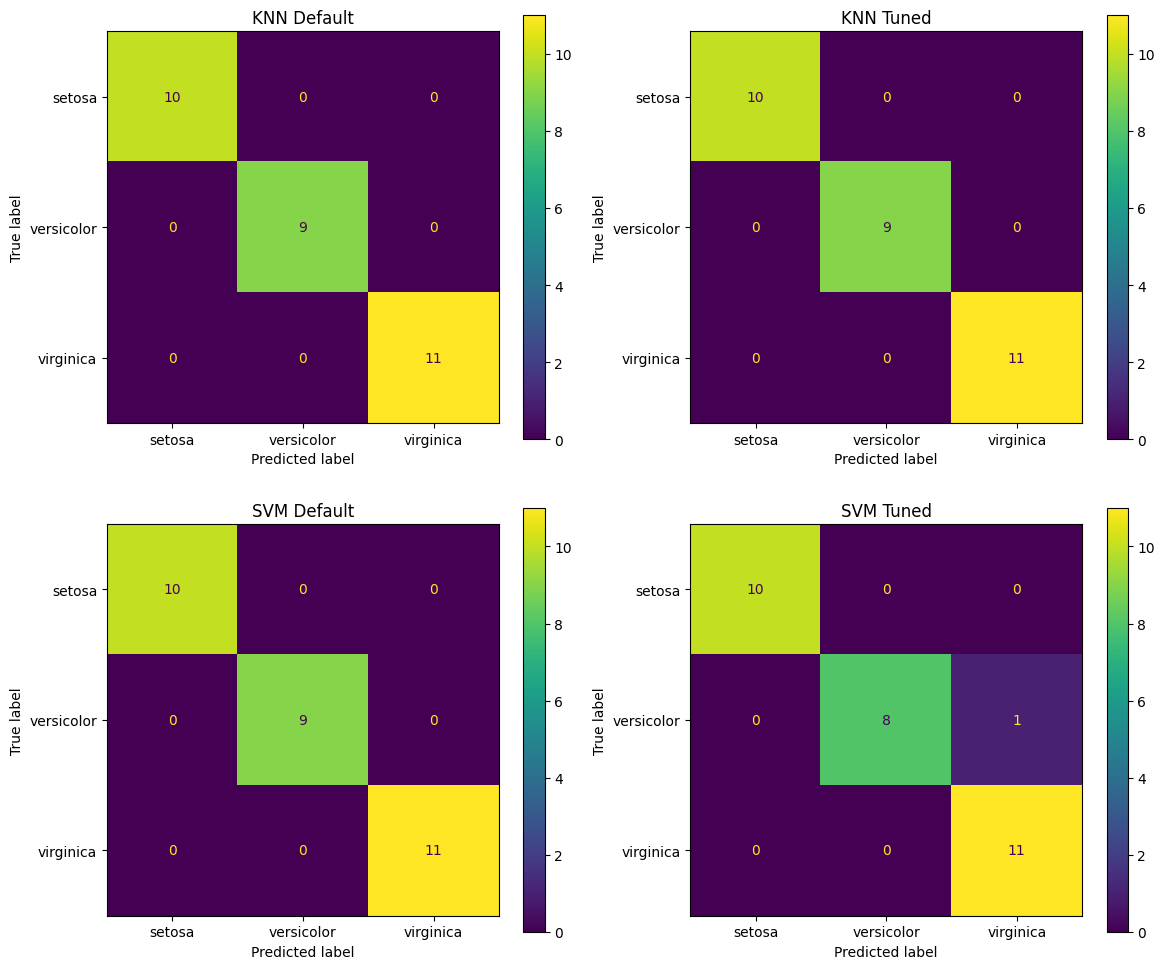

In [ ]:
# Step 6: Visualization

# Confusion Matrix Visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# KNN Default
ConfusionMatrixDisplay.from_estimator(knn_default, X_test_scaled, y_test,
                                     display_labels=target_names, ax=axes[0, 0])
axes[0, 0].set_title('KNN Default')

# KNN Tuned
ConfusionMatrixDisplay.from_estimator(best_knn, X_test_scaled, y_test,
                                     display_labels=target_names, ax=axes[0, 1])
axes[0, 1].set_title('KNN Tuned')

# SVM Default
ConfusionMatrixDisplay.from_estimator(svm_default, X_test_scaled, y_test,
                                     display_labels=target_names, ax=axes[1, 0])
axes[1, 0].set_title('SVM Default')

# SVM Tuned
ConfusionMatrixDisplay.from_estimator(best_svm, X_test_scaled, y_test,
                                     display_labels=target_names, ax=axes[1, 1])
axes[1, 1].set_title('SVM Tuned')

plt.tight_layout()
plt.show()

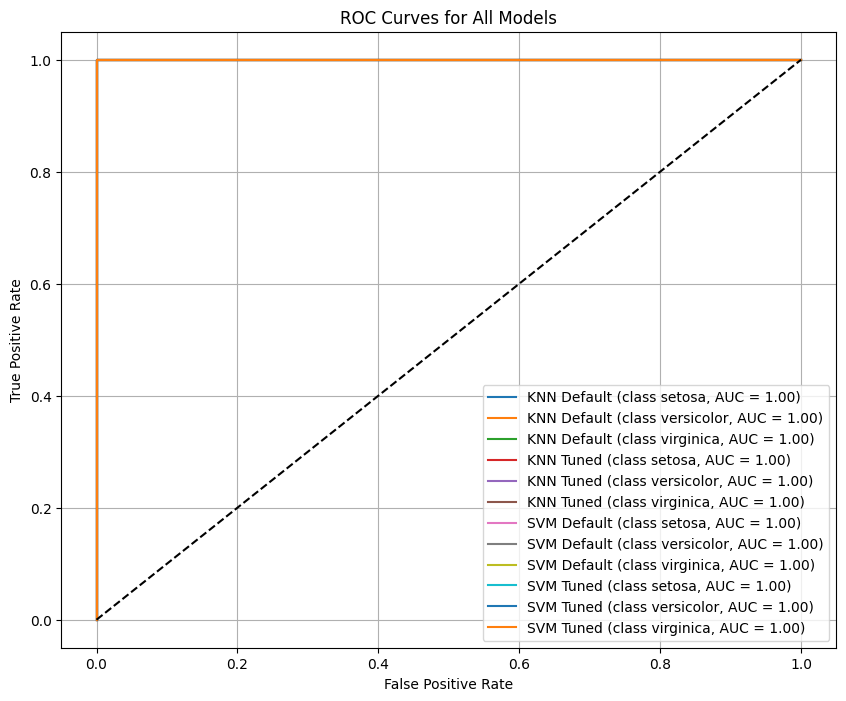

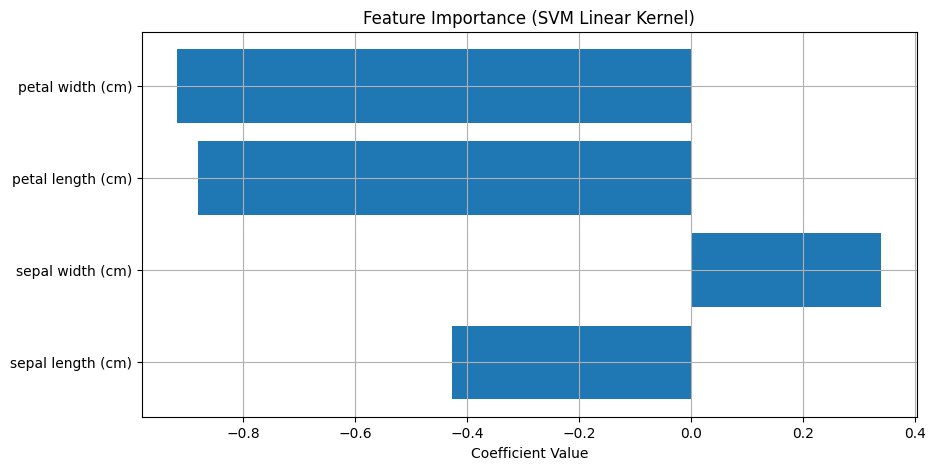

In [ ]:
# ROC Curve Visualization
plt.figure(figsize=(10, 8))

# Binarize the output for ROC curves
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Function to plot ROC for each class
def plot_roc(classifier, X_test, y_test_bin, n_classes, label):
    y_score = classifier.predict_proba(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i],
                 label=f'{label} (class {target_names[i]}, AUC = {roc_auc[i]:.2f})')

# Plot ROC curves for all models
plot_roc(knn_default, X_test_scaled, y_test_bin, n_classes, 'KNN Default')
plot_roc(best_knn, X_test_scaled, y_test_bin, n_classes, 'KNN Tuned')
plot_roc(svm_default, X_test_scaled, y_test_bin, n_classes, 'SVM Default')
plot_roc(best_svm, X_test_scaled, y_test_bin, n_classes, 'SVM Tuned')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Feature Importance Analysis (for SVM with linear kernel)
if best_svm.kernel == 'linear':
    plt.figure(figsize=(10, 5))
    importance = best_svm.coef_[0]
    plt.barh(feature_names, importance)
    plt.xlabel('Coefficient Value')
    plt.title('Feature Importance (SVM Linear Kernel)')
    plt.grid(True)
    plt.show()